In [10]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

import h5py
import numpy as np
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils



Mount your drive on Colab, store and read the dataset and split into train and test sets. – 10 marks

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

In [21]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

Visualising the first 10 images in the train set. – 10 marks

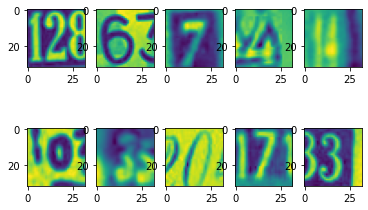

In [26]:
# Show some example images
from matplotlib import pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])

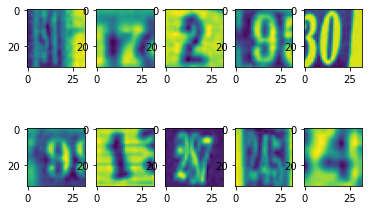

In [34]:
# Show some example images
from matplotlib import pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])

After pre-processing the data as mentioned in the pre-processing notebook, define a function
that returns a tf.keras sequential neural network model. Call the function to initiate the
model. – 20 marks

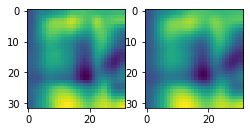

In [33]:
import cv2
preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in X_train:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_images.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

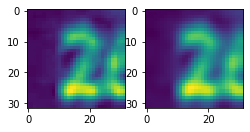

In [35]:
preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in X_test:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_images.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images = np.asarray(preprocessed_images)  

In [38]:
# reshaping the data at hand
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [39]:
# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test / 255.0


In [40]:
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)


In [41]:
seed = 7
np.random.seed(seed)

In [42]:
num_classes = y_test.shape[1]
num_hidden = 32

x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

# 2000 samples to be used in knn modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]


In [60]:
#ANN
classifier = Sequential()
classifier.add(Dense(activation = 'relu', input_dim = 1024, units=1024, kernel_initializer='uniform'))
classifier.add(Dense(6, activation='sigmoid', kernel_initializer='uniform'))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform')) 
classifier.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 6150      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 7         
Total params: 1,055,757
Trainable params: 1,055,757
Non-trainable params: 0
_________________________________________________________________


In [61]:
classifier.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=32)

Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1107 - accuracy: 0.8890 - val_loss: 0.0905 - val_accuracy: 0.9000
Epoch 2/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0902 - accuracy: 0.9000 - val_loss: 0.0901 - val_accuracy: 0.9000
Epoch 3/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0901 - accuracy: 0.9000 - val_loss: 0.0901 - val_accuracy: 0.9000
Epoch 4/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0901 - accuracy: 0.9000 - val_loss: 0.0901 - val_accuracy: 0.9000
Epoch 5/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0901 - accuracy: 0.9000 - val_loss: 0.0901 - val_accuracy: 0.9000
Epoch 6/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0901 - accuracy: 0.9000 - val_loss: 0.0901 - val_accuracy: 0.9000
Epoch 7/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0901 - accuracy: 0.9000 - val_loss: 0.0901 - val_ac

In [63]:
# Evaluate the model.

score = classifier.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09011261910200119
Test accuracy: 0.9000036120414734


Sammry: 


> After using Sequential model the is gins a good result by 90% ACC

